Import Statements

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from pathlib import Path
import os
import yaml
os.getcwd()

'/home/dominic/Documents/research/superconducting_circuit_sim/geometric_gate/Setiawan2022/notebooks'

Import Data

In [8]:
project_root = '../'
output_dir = os.path.join(project_root, 'output')
pulse_dir = os.path.join(output_dir, 'pulses')
gate_dir = os.path.join(output_dir, 'sim_results')

with open(os.path.join(pulse_dir, 'cache_desc.yaml'), 'r') as yamlHandle:
    pulse_cache_desc = yaml.safe_load(yamlHandle)
cz_config = pulse_cache_desc['CZ']
cz_pulse = np.load(f'{pulse_dir}/CZ.npy', allow_pickle=True)
cz_delta_wmod = np.load(f'{pulse_dir}/CZ-_Pulse__delta_wmod.npy', allow_pickle=True)
cz_delta_wmod_a = np.array([tstep['A'] for tstep in cz_delta_wmod])
cz_delta_mmod_b = np.array([tstep['B'] for tstep in cz_delta_wmod])
cz_g_ac = np.load(f'{pulse_dir}/CZ-_Pulse__g_ac.npy', allow_pickle=True)
cz_omega_A = np.load(f'{pulse_dir}/CZ-_Pulse__omega_A.npy', allow_pickle=True)
cz_omega_B = np.load(f'{pulse_dir}/CZ-_Pulse__omega_B.npy', allow_pickle=True)

# append ramp to omega_A, omega_B
t_ramp = cz_config['t_ramp']
tg = cz_config['tg']
dt = cz_config['dt']
omega_0 = cz_config['omega_0'] 
ramp_len = len(np.arange(0, t_ramp, dt))
ramp_up = cz_pulse[:ramp_len]/omega_0
ramp_down = cz_pulse[-ramp_len:]/omega_0
a_ramp = np.repeat(0, ramp_len)
cz_omega_A = np.concatenate((a_ramp, cz_omega_A, a_ramp))
cz_omega_B = np.concatenate((ramp_up, cz_omega_B, ramp_down))


## Make Pulse Plots

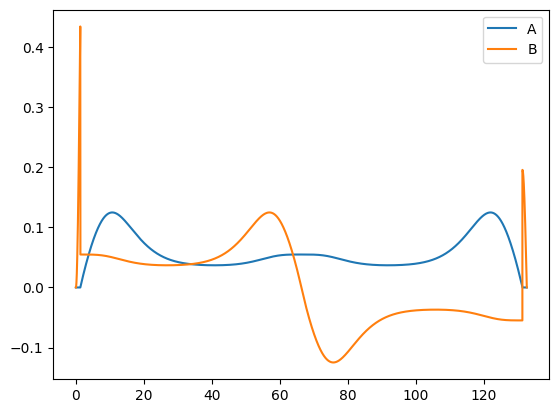

In [9]:
tlist_omegas = np.arange(0, tg + 2* t_ramp, dt)
plt.plot(tlist_omegas, cz_omega_A, label='A')
plt.plot(tlist_omegas, cz_omega_B, label='B')
plt.legend()
plt.show()

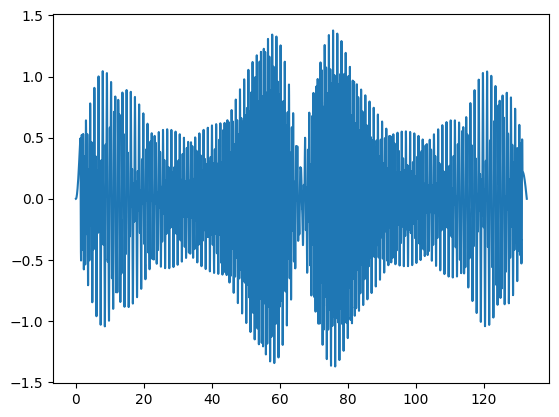

In [7]:
plt.plot(tlist_omegas, cz_pulse)